In [76]:
#import des fichiers et load des ressources
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [77]:
# Charger le dataframe
data = pd.read_csv('cleaned_data.csv')
pd.options.display.max_columns = data.shape[1]

In [78]:
def showScatterPlot(x,y):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.plot(data[x],data[y],'ro',markersize=4)
    plt.show()


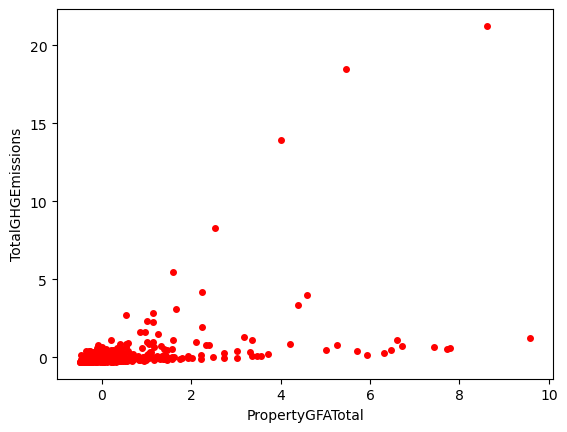

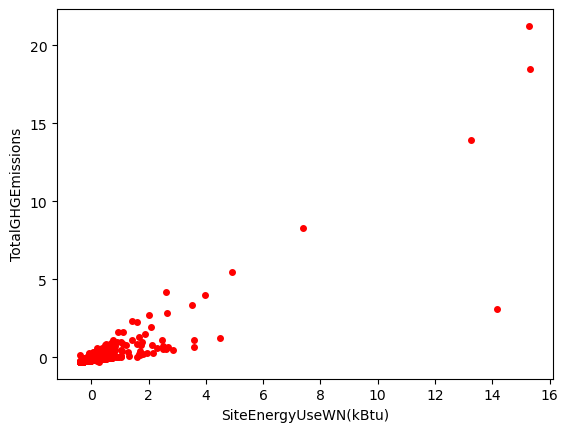

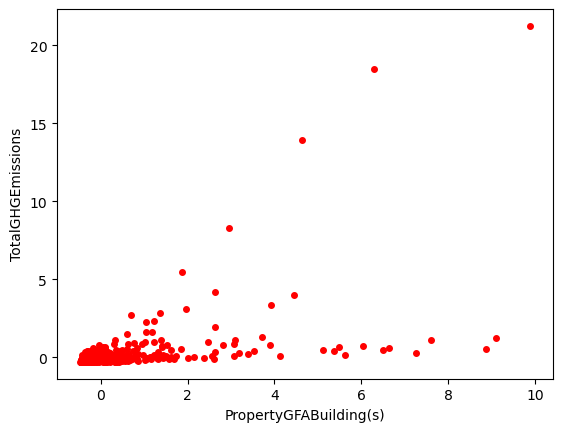

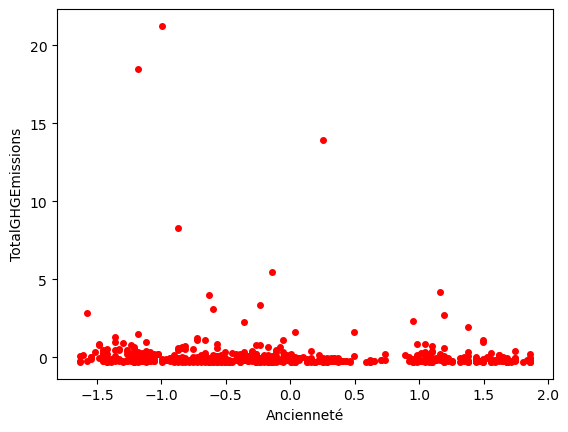

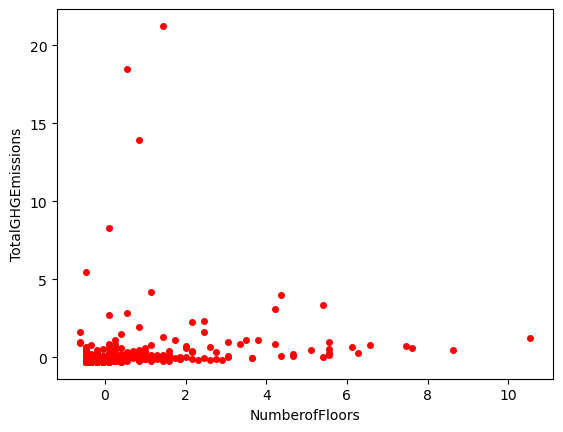

In [79]:
showScatterPlot('PropertyGFATotal','TotalGHGEmissions')
showScatterPlot('SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions')
showScatterPlot('PropertyGFABuilding(s)', 'TotalGHGEmissions')
showScatterPlot('Ancienneté', 'TotalGHGEmissions')
showScatterPlot('NumberofFloors', 'TotalGHGEmissions')


In [82]:
def dummy_regressor_model(cible):
    X = data[['PropertyGFAParking', 'PropertyGFABuilding(s)', 'ENERGYSTARScore', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'Ancienneté', 'Floors_0', 'Floors_1', 'Floors_2', 'Floors_3', 'Floors_4', 'Floors_5', 'Floors_6', 'Floors_7', 'Floors_8', 'Floors_9', 'Floors_10', 'Floors_11', 'Floors_12', 'Floors_13', 'Floors_14', 'Floors_15', 'Floors_16', 'Floors_17', 'Floors_18', 'Floors_19', 'Floors_20', 'Floors_21', 'Floors_22', 'Floors_23', 'Floors_24', 'Floors_25', 'Floors_27', 'Floors_28', 'Floors_29', 'Floors_30', 'Floors_33', 'Floors_34', 'Floors_36', 'Floors_37', 'Floors_39', 'Floors_41', 'Floors_42', 'Floors_46', 'Floors_47', 'Floors_49', 'Floors_55', 'Floors_56', 'Floors_63', 'Floors_76', 'Floors_99', 'Buildings_0.0', 'Buildings_1.0', 'Buildings_2.0', 'Buildings_3.0', 'Buildings_4.0', 'Buildings_5.0', 'Buildings_6.0', 'Buildings_7.0', 'Buildings_8.0', 'Buildings_9.0']]

    y = data[cible]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    return 'RMSE:', rmse
print(
    dummy_regressor_model('TotalGHGEmissions'),
)



('RMSE:', 23415.72163639914) ('RMSE:', 8.298467544661343e-05)


In [81]:


'''
    baseline : dummyregressor
    tester les différents niveau de profondeur de l'arbre de décision avec sckit learn
    et avec la méthode gridsearch
    utiliser pipeline
'''

"\n    baseline : dummyregressor\n    tester les différents niveau de profondeur de l'arbre de décision avec sckit learn\n    et avec la méthode gridsearch\n    utiliser pipeline\n"